In [2]:
from utilities import *
from plot_utilities import *

np.random.seed(42)

In [3]:
def gen_gamma_mean(r, eta):
    return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)

def gen_gamma_variance(r, eta):
    mean = gen_gamma_mean(r, eta)
    second_moment = scipy.special.gamma((eta+3.5)/r) / scipy.special.gamma((eta+1.5)/r)
    return second_moment - mean**2

C:\Users\yashd\AppData\Local\Temp\ipykernel_18340\691241735.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


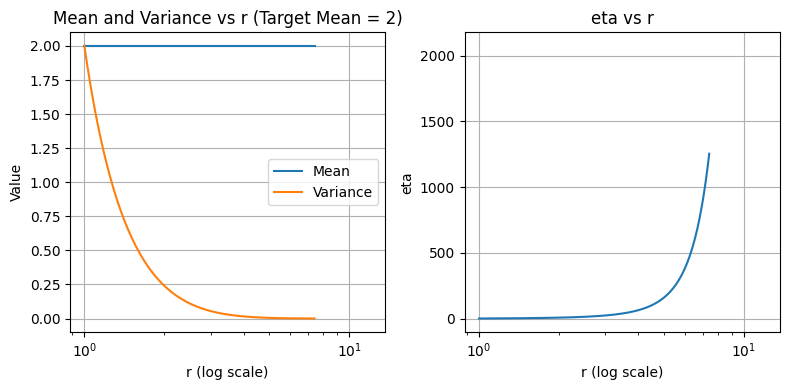

r		eta		Mean		Variance
1.00		0.50		2.000000		2.000000
1.41		2.46		2.000000		0.724429
2.00		6.95		2.000000		0.243604
2.82		19.34		2.000000		0.069931
3.99		63.18		2.000000		0.015782
5.63		280.39		2.000000		0.002536
7.96		nan		nan		nan
11.25		nan		nan		nan
15.89		nan		nan		nan
22.46		nan		nan		nan


In [40]:
def find_eta_for_target_mean(r, target_mean):
    def objective(eta):
        return (gen_gamma_mean(r, eta) - target_mean)**2
    result = scipy.optimize.minimize_scalar(objective)
    return result.x

# Set the target mean
target_mean = 2

r2_values = []
eta2_values = []
mean_values = []
variance_values = []

for r in np.logspace(0, 1.5, 1000):  # r from 1 to 1000
    eta = find_eta_for_target_mean(r, target_mean)
    mean = gen_gamma_mean(r, eta)
    variance = gen_gamma_variance(r, eta)
    
    r2_values.append(r)
    eta2_values.append(eta)
    mean_values.append(mean)
    variance_values.append(variance)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.semilogx(r2_values, mean_values, label='Mean')
ax1.semilogx(r2_values, variance_values, label='Variance')
ax1.set_xlabel('r (log scale)')
ax1.set_ylabel('Value')
ax1.set_title(f'Mean and Variance vs r (Target Mean = {target_mean})')
ax1.legend()
ax1.grid(True)

ax2.semilogx(r2_values, eta2_values)
ax2.set_xlabel('r (log scale)')
ax2.set_ylabel('eta')
ax2.set_title('eta vs r')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("r\t\teta\t\tMean\t\tVariance")
for i in range(0, len(r2_values), len(r2_values)//10):
    print(f"{r2_values[i]:.2f}\t\t{eta2_values[i]:.2f}\t\t{mean_values[i]:.6f}\t\t{variance_values[i]:.6f}")

selected_indices = np.arange(0, 4) # [0, len(r_values)//4, len(r_values)//2, -1]
selected_params = [(r2_values[i], eta2_values[i]) for i in selected_indices]


<Axes: >

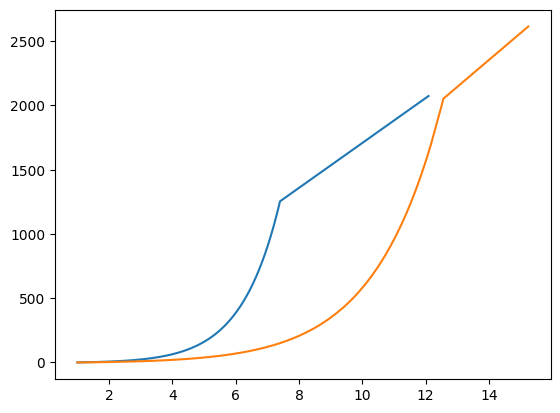

In [47]:
sns.lineplot(x = r2_values, y= eta2_values)
sns.lineplot(x = r15_values, y= eta15_values)
#sns.lineplot(x = r1_values, y= eta1_values)

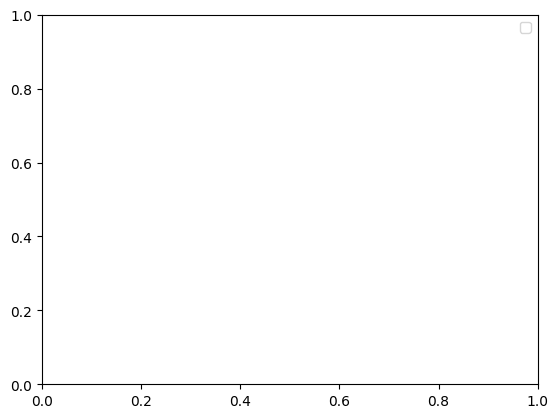

In [69]:
plt.legend('bottom')

No Tail
No Tail
No Tail
No Tail


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:313: RuntimeWarning: overflow encountered in scalar power
  return (r/scipy.special.gamma(beta)) * (1/scale) * (theta/scale)**(r*beta - 1) * np.exp(-(theta/scale)**r)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:313: RuntimeWarning: invalid value encountered in scalar multiply
  return (r/scipy.special.gamma(beta)) * (1/scale) * (theta/scale)**(r*beta - 1) * np.exp(-(theta/scale)**r)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:319: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the int

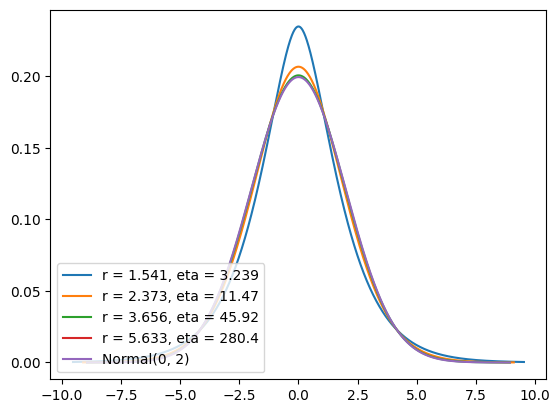

In [84]:
r_vals, eta_vals = r2_values, eta2_values
target_mean = 2
for i in range(0, len(r_vals), len(r_vals)//8)[1:-3]:
    xs, pdf = compute_prior_pdf(r_vals[i], eta_vals[i], n_samples=1000)
    plt.plot(xs, pdf, label = f'r = {round_to_sigfigs(r_vals[i], 4)}, eta = {round_to_sigfigs(eta_vals[i], 4)}')
plt.plot(xs, stats.norm(scale=target_mean).pdf(xs), label = f'Normal(0, {target_mean})')

plt.legend(loc='lower left')
plt.savefig('images/gengamma_gaussian_analysis_var2.png', bbox_inches = 'tight')

No Tail
No Tail
No Tail
No Tail


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:313: RuntimeWarning: overflow encountered in scalar power
  return (r/scipy.special.gamma(beta)) * (1/scale) * (theta/scale)**(r*beta - 1) * np.exp(-(theta/scale)**r)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:313: RuntimeWarning: invalid value encountered in scalar multiply
  return (r/scipy.special.gamma(beta)) * (1/scale) * (theta/scale)**(r*beta - 1) * np.exp(-(theta/scale)**r)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:319: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  prior_pdf[j] = integrate.quad(integrand, 0, np.inf)[0]


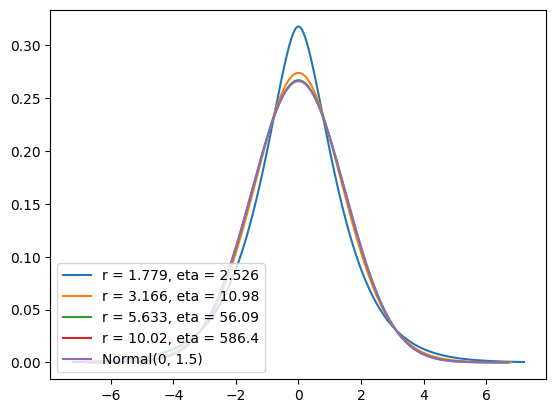

In [85]:
r_vals, eta_vals = r15_values, eta15_values
target_mean = 1.5
for i in range(0, len(r_vals), len(r_vals)//8)[1:-3]:
    xs, pdf = compute_prior_pdf(r_vals[i], eta_vals[i], n_samples=1000)
    plt.plot(xs, pdf, label = f'r = {round_to_sigfigs(r_vals[i], 4)}, eta = {round_to_sigfigs(eta_vals[i], 4)}')
plt.plot(xs, stats.norm(scale=1.5).pdf(xs), label = f'Normal(0, 1.5)')

plt.legend(loc='lower left')
plt.savefig('images/gengamma_gaussian_analysis_var15.png', bbox_inches = 'tight')

No Tail
No Tail
No Tail
No Tail


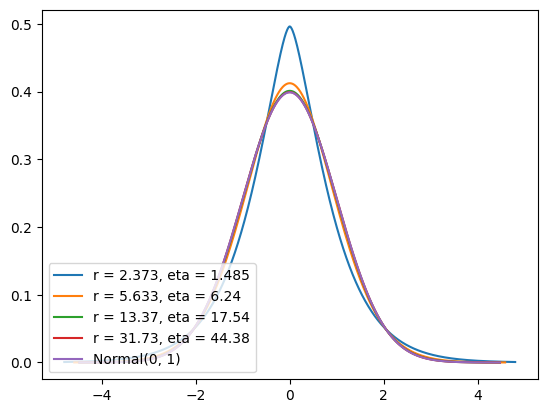

In [83]:
r_vals, eta_vals = r1_values, eta1_values
target_mean = 1
for i in range(0, len(r_vals), len(r_vals)//8)[1:-3]:
    xs, pdf = compute_prior_pdf(r_vals[i], eta_vals[i], n_samples=1000)
    plt.plot(xs, pdf, label = f'r = {round_to_sigfigs(r_vals[i], 4)}, eta = {round_to_sigfigs(eta_vals[i], 4)}')
plt.plot(xs, stats.norm(scale=target_mean).pdf(xs), label = f'Normal(0, {target_mean})')

plt.legend(loc='lower left')
plt.savefig('images/gengamma_gaussian_analysis_var1.png', bbox_inches = 'tight')

In [ ]:
xs1, pdf1 = compute_prior_pdf(r15_values[5], eta15_values[5])
xs2, pdf2 = compute_prior_pdf(32.30, 45.82)
xs3, pdf3 = compute_prior_pdf(8.11, 9.86)
for i in range(0, len(r2_values), len(r2_values)//10):
    

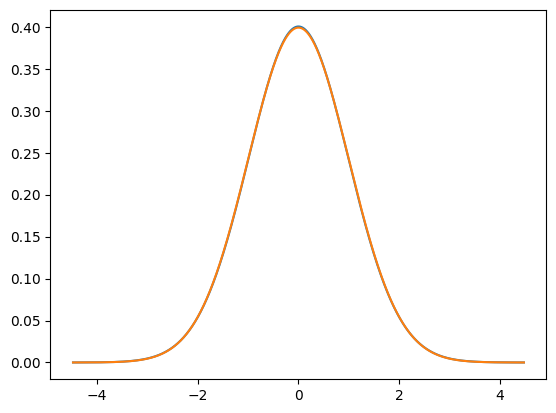

In [90]:
#plt.plot(xs1, stats.norm(scale=2).pdf(xs1), label = 'Normal')
plt.plot(xs1, pdf1, )
plt.plot(xs2, pdf2)
plt.legend()

No Tail
No Tail
No Tail


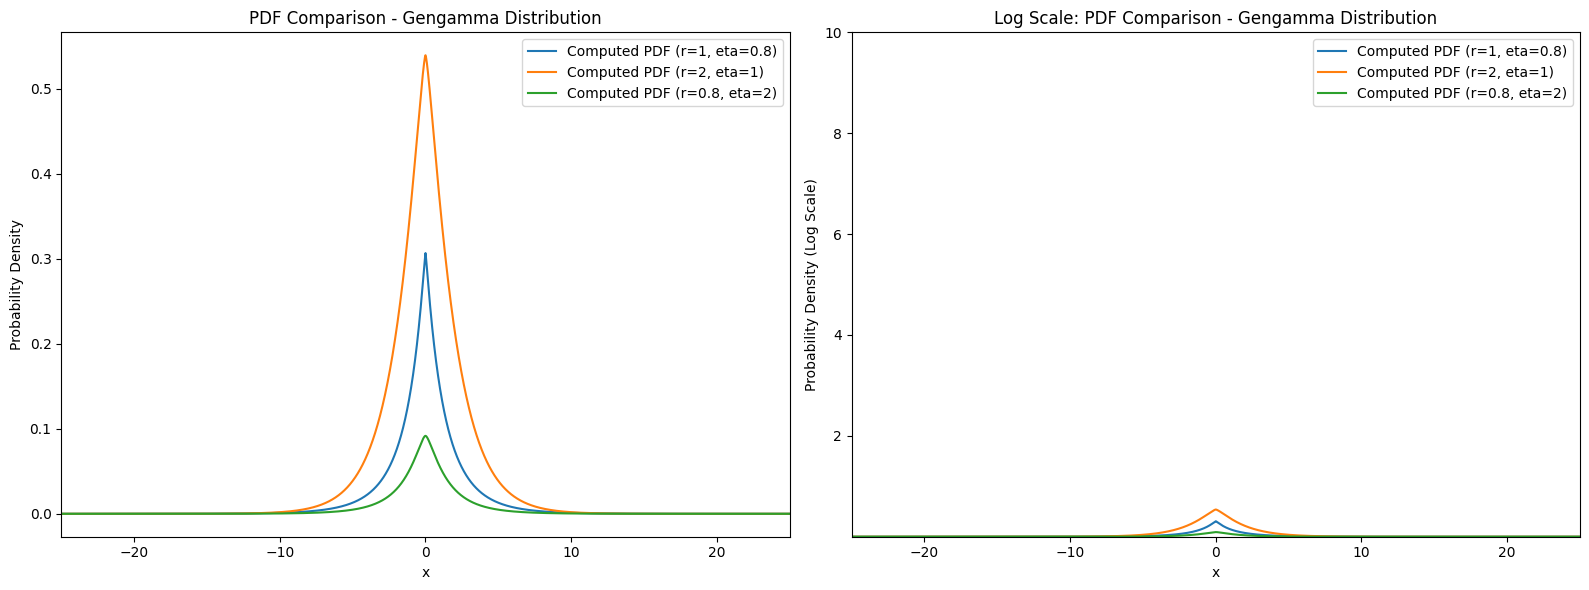

In [40]:
params_list = [(1, 0.8), (2, 1), (0.8, 2)]  # List of (r, eta) pairs for gengamma
sample_data = np.random.normal(0, 1, 1000)  # Optional sample data
fig = visualize_pdf(params_list, distro='gengamma')
plt.show()

No Tail


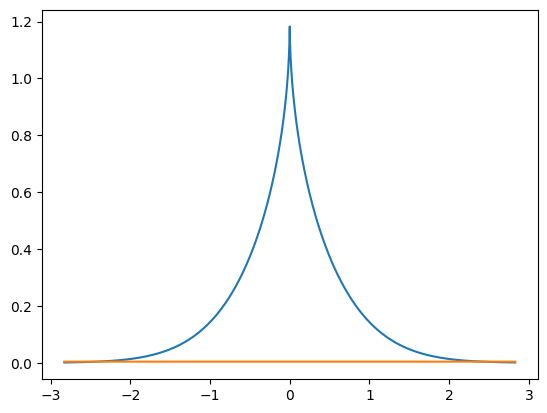

In [37]:
xs, pdf = compute_prior_pdf(r_test- 50, eta_test)
plt.plot(xs, pdf)
plt.plot(xs, stats.norm(scale = target_mean).pdf(xs))

In [54]:
def compute_distribution(params, distro, n_samples=10000, all_cdfs=None):
    xs = np.linspace(-30, 30, n_samples)
    if distro == 'gengamma':
        r, eta = params
        if all_cdfs and (r, eta) in all_cdfs:
            null_cdf = all_cdfs[(r, eta)]
        else:
            null_cdf = compute_prior_cdf(r=r, eta=eta, n_samples=n_samples)
        xs_pdf, computed_pdf = compute_prior_pdf(r, eta, tail_bound=0.01)
    elif distro in ['gaussian', 'normal']:
        null_cdf = stats.norm(scale=params).cdf
        computed_pdf = stats.norm(scale=params).pdf(xs)
        xs_pdf = xs
    elif distro == 'laplace':
        null_cdf = stats.laplace(scale=params).cdf
        computed_pdf = stats.laplace(scale=params).pdf(xs)
        xs_pdf = xs
    else:
        raise ValueError(f"Unsupported distribution: {distro}")
    return xs, null_cdf, xs_pdf, computed_pdf

def visualize_cdf(params, distro='gengamma', sample=None, n_samples=10000, interval=None, provided_loc=None, all_cdfs=None, layer=None, ax=None):
    xs, null_cdf, _, _ = compute_distribution(params, distro, n_samples, all_cdfs)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.set_xlim(left=-25, right=25)
    if interval:
        ax.set_xlim(left=interval[0], right=interval[1])
    
    ax.plot(xs, null_cdf(xs), label='Computed CDF')
    
    if sample is not None:
        sample = np.sort(sample)
        n = len(sample)
        ax.plot(sample, np.arange(1, n+1)/n, label='Empirical CDF')
        result = stats.ks_1samp(sample, null_cdf)
        distance = result.statistic
        location = result.statistic_location
        emp_cdf_at_loc = np.searchsorted(sample, location, side='right') / n
        computed_cdf_at_loc = null_cdf(location)
        ax.vlines(location, emp_cdf_at_loc, computed_cdf_at_loc, linestyles='--', 
                  label=f'Max Deviation: {np.round(distance, 6)}\nat x={np.round(location, 6)}', 
                  color='xkcd:bright red')
        
        if provided_loc is not None:
            emp_cdf_at_provided_loc = np.searchsorted(sample, provided_loc, side='right') / n
            computed_cdf_at_provided_loc = null_cdf(provided_loc)
            ax.vlines(provided_loc, emp_cdf_at_provided_loc, computed_cdf_at_provided_loc, 
                      linestyles='--', 
                      label=f'Deviation: {np.round(emp_cdf_at_provided_loc - computed_cdf_at_provided_loc, 6)}\nat x={np.round(provided_loc, 6)}', 
                      color='xkcd:shamrock green')
    
    if distro == 'gengamma':
        r, eta = params
        title = f'{f"Layer {layer}" if layer else ""} {"Empirical and " if sample is not None else ""}Computed CDF \n (r={r}, eta={eta})'
        if sample is not None:
            title += f' with p-value:{np.round(result.pvalue, 8)}'
    else:
        title = f'{f"Layer {layer}" if layer else ""} {"Empirical and " if sample is not None else ""}Computed CDF \n {distro} (0, {params})'
    
    ax.set_title(title)
    ax.legend()
    
    if ax is None:
        return fig
    else:
        return ax

def visualize_pdf(params, distro='gengamma', sample=None, n_samples=10000, interval=None, bw=0.05, log_scale=True, layer=None, ax=None):
    _, _, xs_pdf, computed_pdf = compute_distribution(params, distro, n_samples)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.set_xlim(left=-25, right=25)
    if interval:
        ax.set_xlim(left=interval[0], right=interval[1])
    
    ax.plot(xs_pdf, computed_pdf, label='Computed PDF')
    
    if sample is not None:
        if log_scale:
            sns.kdeplot(ax=ax, x=sample, bw_method=bw, log_scale=[False, True], label=f"Empirical PDF (KDE, bw={bw})")
        else:
            sns.kdeplot(sample, bw_method=bw, ax=ax, label=f'Empirical PDF (KDE, bw={bw})')
    
    if log_scale:
        ax.set_yscale('log')
        ax.set_ylim(bottom=10**-4, top=10)
    
    if distro == 'gengamma':
        r, eta = params
        title = f'{f"Layer {layer}" if layer else ""} {"Empirical and " if sample is not None else ""}Computed PDF \n (r={r}, eta={eta})'
    else:
        title = f'{f"Layer {layer}" if layer else ""} {"Empirical and " if sample is not None else ""}Computed PDF \n {distro} (0, {params})'
    
    if log_scale:
        title = f'Log Scale: {title}'
    
    ax.set_title(title)
    ax.legend()
    
    if ax is None:
        return fig
    else:
        return ax

def visualize_cdf_pdf(sample, params, distro='gengamma', log_scale=True, n_samples=10000, interval=None, provided_loc=None, all_cdfs=None, layer=None, bw=0.05):
    if log_scale:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # CDF plot
    visualize_cdf(params, distro, sample, n_samples, interval, provided_loc, all_cdfs, layer, ax=ax1)
    
    # PDF plot
    if log_scale:
        visualize_pdf(params, distro, sample, n_samples, interval, bw, log_scale=False, layer=layer, ax=ax2)
        visualize_pdf(params, distro, sample, n_samples, interval, bw, log_scale=True, layer=layer, ax=ax3)
    else:
        visualize_pdf(params, distro, sample, n_samples, interval, bw, log_scale=False, layer=layer, ax=ax2)
    
    plt.tight_layout()
    return fig

In [66]:
obs_x_dict = pd.read_pickle('panoptic/obs_x_dict.pickle')
all_cdfs = combine_pickles('scipy_10000') | combine_pickles('mtlb_10000') 
layer = 3

visualize_pdf(sample = obs_x_dict[layer], 
                      params = (0.7, 3.6), 
                      distro='gengamma',
                      #log_scale = True,
                      #all_cdfs = all_cdfs,
                      layer = layer)

No Tail


KeyboardInterrupt: 